In [ ]:
import numpy
import functools
import operator

In [ ]:
def img2chromosome(img_arr):
 
    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

In [ ]:
def chromosome2img(vector, shape):

    # Check if the vector can be reshaped according to the specified shape.
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [ ]:
!pip install pygad
import numpy
import imageio
import pygad
import matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
# Reading target image to be reproduced using Genetic Algorithm (GA).
target_im = imageio.v2.imread('/content/fruit.jpg')
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

<ipython-input-6-79e4e79bd751>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_im = numpy.asarray(target_im/255, dtype=numpy.float)


In [ ]:
# Target image after enconding. Value encoding is used.
target_chromosome = img2chromosome(target_im)

In [ ]:
def fitness_fun(ga_instance, solution, solution_idx):

    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [ ]:
def callback(ga_instance):
    print("Generation = {gen}".format(gen=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

    if ga_instance.generations_completed % 500 == 0:
        matplotlib.pyplot.imsave('solution_'+str(ga_instance.generations_completed)+'.png', 
                                 chromosome2img(ga_instance.best_solution()[0], target_im.shape))

In [ ]:
ga_instance = pygad.GA(num_generations=50000,
                       num_parents_mating=10,
                       fitness_func=fitness_fun,
                       sol_per_pop=20,
                       num_genes=target_im.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

In [ ]:
ga_instance.run()


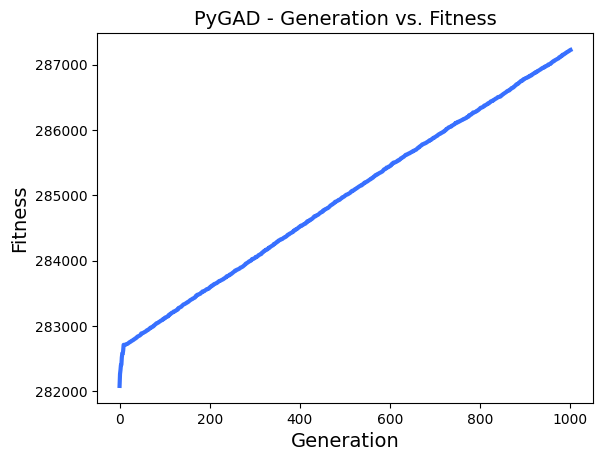

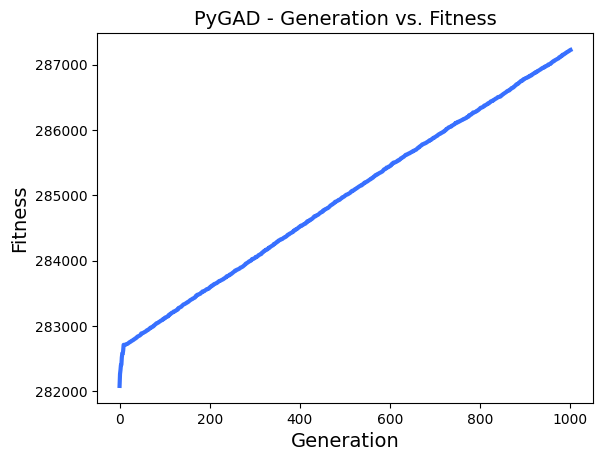

In [ ]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

In [ ]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 287227.2700918396
Index of the best solution : 18


In [ ]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()

NameError: ignored